## MIE424 (2023 Winter) Lab 4

Presented by Arnaud Deza

In this lab, we will illustrate an example of linear regression, ridge regression and non-parametric regression

## 1. Linear Regression

In this section, we fit a linear model with positive constraints on the regression coefficients and compare the estimated coefficients to a classic linear regression and compare it with the simple linear regression.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
# Seed for reproducibility
np.random.seed(424)

##### Creating data

In [2]:
# Step 1: Create data
n_samples, n_features = 200, 50

# X is a matrix of (200,50) i.e (n,d)
X = np.random.randn(n_samples, n_features)     

# "w" is a vector of size 50 (i.e w in R^{d})
true_coef = 3 * np.random.randn(n_features)     # returning d samples from the std Normal distrib

# Threshold coefficients to render them non-negative
true_coef[true_coef < 0] = 0          

# Creating labels y whilst respecting inherent i.i.d distribution with some small noise
y = np.dot(X, true_coef)

# Add some noise to y --> this is done because I don't wan't to use a linear model on data that 
# is generated from a linear "model" (or transformation)
y += 5 * np.random.normal(size=(n_samples, ))

In [3]:
# Split the data in train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

NameError: name 'train_test_split' is not defined

##### Training Linear Regression Model

In [58]:
# Fit the ordinary least squares.
reg_ols = LinearRegression()
y_pred_ols = reg_ols.fit(X_train, y_train).predict(X_test)
r2_score_ols = r2_score(y_test, y_pred_ols)
print("OLS R2 score", r2_score_ols)

OLS R2 score 0.7223490690092034


In [59]:
# Fit the Non-Negative least squares.
reg_nnls = LinearRegression(positive=True)#add positive constraint on the coefficients
y_pred_nnls = reg_nnls.fit(X_train, y_train).predict(X_test)
r2_score_nnls = r2_score(y_test, y_pred_nnls)
print("NNLS R2 score", r2_score_nnls)

NNLS R2 score 0.7719912129073527


In [60]:
print("Coefficients for LS Linear Regression:")
print(reg_ols.coef_)

Coefficients for LS Linear Regression:
[ 1.27739558  0.36352809 -1.04560704 -1.19861211  0.5047119   2.64876616
  2.32808271 -0.70264102 -0.41727687  0.27532317  1.41262832  0.66732073
 -1.14626017  0.6133733   2.09031634  2.22612064  3.93437968  0.09013485
 -0.60119409 -0.14878934 -0.03244491  3.93385039  0.2773816   5.59401205
 -0.18414631  2.27541502  0.35097619  3.86055895  0.57014057  2.12859482
 -0.37885984  2.10027102 -0.81323332  1.21982163  1.7736638   0.73759476
  1.82143287  3.85704386  2.74615997  0.6898253   0.93792716  1.17068737
  0.12951429  2.74205914  0.59790069 -0.75547821  0.82738087  0.62376161
  1.18043671 -0.01377664]


In [61]:
print("Coefficients for NNLS Regression:")
print(reg_nnls.coef_)

Coefficients for NNLS Regression:
[1.69830465 0.47368254 0.         0.         0.45636845 2.79603068
 1.95551401 0.         0.         0.         1.38083895 0.58725526
 0.         0.37135723 2.09096012 2.40543478 3.54054876 0.57173518
 0.         0.36404772 0.         3.20767342 0.54808788 5.68674786
 0.         1.97226474 0.57480083 4.71995441 0.52366179 2.61837495
 0.         2.13459422 0.         1.04889109 1.24814004 0.43094831
 1.66600201 3.51585602 3.02052136 0.4603399  1.22034148 1.33057314
 0.25245289 3.24118535 0.53664635 0.         0.69253801 0.31610505
 0.95539379 0.        ]


Discussion: Why do you think the NNLS has a better out of sample R-squared value than OLS in this example?

Let's now visualize the difference between the OLS and the NNLS coefficients:

Text(0, 0.5, 'NNLS regression coefficients')

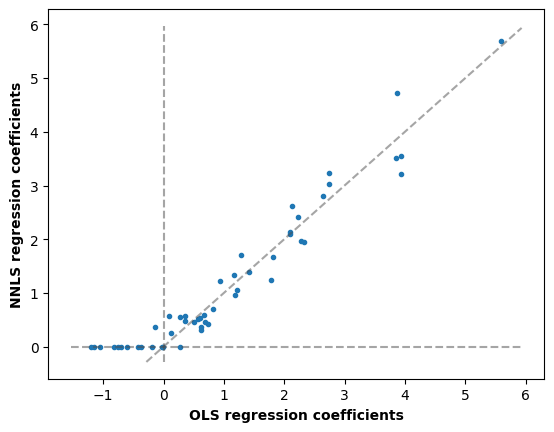

In [62]:
fig, ax = plt.subplots()
ax.plot(reg_ols.coef_, reg_nnls.coef_, linewidth=0, marker=".")

low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = max(low_x, low_y)
high = min(high_x, high_y)
ax.plot([low, high], [low, high], ls="--", c=".3", alpha=.5)
ax.plot([low_x, high_x], [0, 0], ls="--", c=".3", alpha=.5)
ax.plot([0, 0], [low_y, high_y], ls="--", c=".3", alpha=.5)
ax.set_xlabel("OLS regression coefficients", fontweight="bold")
ax.set_ylabel("NNLS regression coefficients", fontweight="bold")

Comparing the regression coefficients between OLS and NNLS, we can observe they are highly correlated (the dashed line is the identity relation), but the non-negative constraint pushes many negative OLS coefficients to 0. The Non-Negative Least squares inherently yields sparser results.

This example is from the following [sklearn documentation](https://scikit-learn.org/stable/auto_examples/linear_model/plot_nnls.html#sphx-glr-auto-examples-linear-model-plot-nnls-py).

## 2. Ridge Regression

In this section, we explore the linear least square regression with l2 regularization.

Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients. The ridge coefficients minimize a penalized residual sum of squares:

$$\min\limits_w\|Xw-y\|_2^2+\alpha\|w\|_2^2$$

The penalization strength  parameter $\alpha>0$ controls the amount of shrinkage: the larger the value of $\alpha$ the greater the amount of shrinkage and thus the coefficients become more robust to collinearity. For $\alpha=0$, it the ordinary least square regression.

Continue on the example provided in section 1, we could fit a ridge regression model on the same dataset and compare coeffients with simple linear regression.

In [63]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge

In [64]:
# Fit the least squares with l1 regularization (Ridge Regression)
alphas=[1e-4,1e-3,1e-2,1e-1,1,1e1,1e2,1e3]
model = RidgeCV(alphas,scoring='r2')
model.fit(X_train,y_train)
y_pred_ridge = model.predict(X_test)
r2_score_ridge = r2_score(y_test, y_pred_ridge)
print("Ridge R2 score", r2_score_ridge)
print("Selected alpha value by CV:", model.alpha_)

Ridge R2 score 0.7063777636849691
Selected alpha value by CV: 10.0


Text(0, 0.5, 'Ridge regression coefficients with alpha = 10.000000')

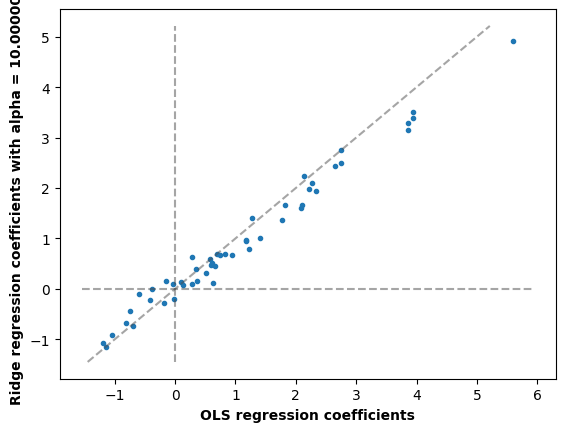

In [65]:
fig, ax = plt.subplots()
ax.plot(reg_ols.coef_, model.coef_, linewidth=0, marker=".")

low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = max(low_x, low_y)
high = min(high_x, high_y)
ax.plot([low, high], [low, high], ls="--", c=".3", alpha=.5)
ax.plot([low_x, high_x], [0, 0], ls="--", c=".3", alpha=.5)
ax.plot([0, 0], [low_y, high_y], ls="--", c=".3", alpha=.5)
ax.set_xlabel("OLS regression coefficients", fontweight="bold")
ax.set_ylabel("Ridge regression coefficients with alpha = %f"%model.alpha_, fontweight="bold")

You can also use other alpha values:

Ridge R2 score 0.5066316462543745
Alpha value used: 100.0


Text(0, 0.5, 'Ridge regression coefficients with alpha = 100.000000')

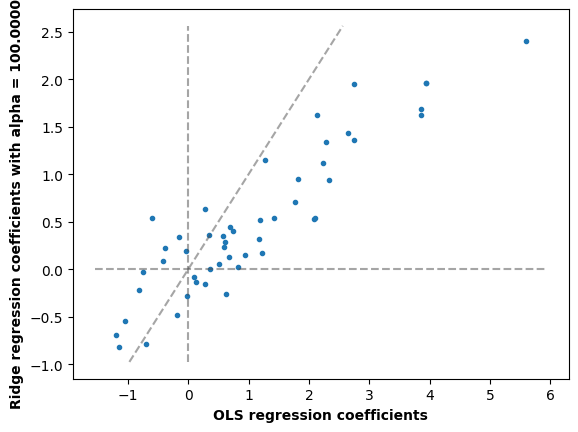

In [66]:
ridge_alpha = 1e2

model = Ridge(ridge_alpha)
model.fit(X_train,y_train)
y_pred_ridge = model.predict(X_test)
r2_score_ridge = r2_score(y_test, y_pred_ridge)
print("Ridge R2 score", r2_score_ridge)
print("Alpha value used:", ridge_alpha)

fig, ax = plt.subplots()
ax.plot(reg_ols.coef_, model.coef_, linewidth=0, marker=".")

low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = max(low_x, low_y)
high = min(high_x, high_y)
ax.plot([low, high], [low, high], ls="--", c=".3", alpha=.5)
ax.plot([low_x, high_x], [0, 0], ls="--", c=".3", alpha=.5)
ax.plot([0, 0], [low_y, high_y], ls="--", c=".3", alpha=.5)
ax.set_xlabel("OLS regression coefficients", fontweight="bold")
ax.set_ylabel("Ridge regression coefficients with alpha = %f"%ridge_alpha, fontweight="bold")

Ridge R2 score 0.7223526441676357
Alpha value used: 0.01


Text(0, 0.5, 'Ridge regression coefficients with alpha = 0.010000')

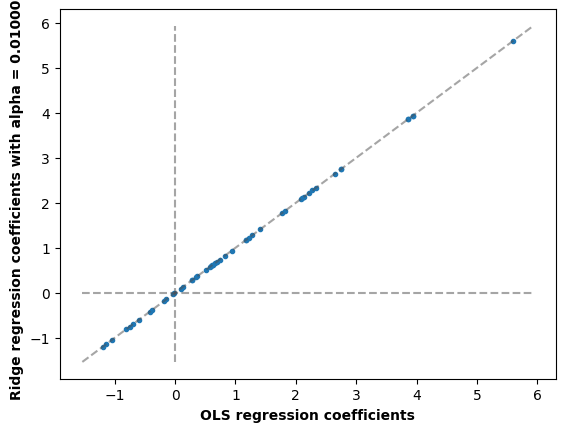

In [67]:
ridge_alpha = 1e-2

model = Ridge(ridge_alpha)
model.fit(X_train,y_train)
y_pred_ridge = model.predict(X_test)
r2_score_ridge = r2_score(y_test, y_pred_ridge)
print("Ridge R2 score", r2_score_ridge)
print("Alpha value used:", ridge_alpha)

fig, ax = plt.subplots()
ax.plot(reg_ols.coef_, model.coef_, linewidth=0, marker=".")

low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = max(low_x, low_y)
high = min(high_x, high_y)
ax.plot([low, high], [low, high], ls="--", c=".3", alpha=.5)
ax.plot([low_x, high_x], [0, 0], ls="--", c=".3", alpha=.5)
ax.plot([0, 0], [low_y, high_y], ls="--", c=".3", alpha=.5)
ax.set_xlabel("OLS regression coefficients", fontweight="bold")
ax.set_ylabel("Ridge regression coefficients with alpha = %f"%ridge_alpha, fontweight="bold")

## 3. Non-parametric Regression Example: Isotonic Regression

The `sklearn.isotonic.IsotonicRegression` fits a non-decreasing real function to 1-dimensional data. 

It solves the following problem:

$$\min\limits_{\hat{y}_i} \sum_i w_i(y_i-\hat{y}_i)^2$$

$$\text{subject to } \hat{y}_i\leq\hat{y}_j \forall X_i\leq X_j$$

where the wegihts $w_i$ are strictly positive and $X_i,y_i\in\mathbb{R}$. If not specified then it is assumed that the weights $w_i=1 \forall i$

IsotonicRegression produces a series of predictions $\hat{y}_i$ for the training data which are the closest to the targets $y$ in terms of mean squared error ($\sum_i w_i(y_i-\hat{y}_i)^2$). 

These predictions are interpolated for predicting to unseen data. The predictions of IsotonicRegression thus form a function that is piecewise linear.

`sklearn.isotonic.IsotonicRegression(*, y_min=None, y_max=None, increasing=True, out_of_bounds='nan')[source]`

- `y_min`: float, default=None. Lower bound on the lowest predicted value (the minimum value may still be higher). If not set, defaults to `-inf`.
- `y_max`: float, default=None. Upper bound on the highest predicted value (the maximum may still be lower). If not set, defaults to `+inf`.
- `increasing`: bool or ‘auto’, default=True. Determines whether the predictions should be constrained to increase or decrease with X. ‘auto’ will decide based on the Spearman correlation estimate’s sign.
- `out_of_bounds`: {`‘nan’, ‘clip’, ‘raise’`}, default=`’nan’`. Handles how X values outside of the training domain are handled during prediction.
    - ‘nan’, predictions will be `NaN`.
    - ‘clip’, predictions will be set to the value corresponding to the nearest train interval endpoint.
    - ‘raise’, a `ValueError` is raised.

The isotonic regression algorithm finds a non-decreasing approximation of a function while minimizing the mean squared error on the training data. 

The benefit of such a non-parametric model is that it does not assume any shape for the target function besides monotonicity. 

This example tries to compare linear regression and isotonic regression.

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

from sklearn.linear_model import LinearRegression
from sklearn.isotonic import IsotonicRegression
from sklearn.utils import check_random_state

# create X data matrix will will only have 100 samples w/ 1 feature each
n = 100
x = np.arange(n)

# Create y labels but make it monotonic so use log but also add some random noise
rs = check_random_state(0)
y =  50. * np.log1p(np.arange(n))     +  rs.randint(-50, 50, size=(n,))                  #log1p(x) --> calculates log(1+x)

In [ ]:
# Let's quickly visualize this
#plt.plot(x,np.log1p(np.arange(n)))#
plt.plot(x,y)
plt.ylabel("y")
plt.xlabel("X")
plt.show()

In [ ]:
# Fit IsotonicRegression and LinearRegression models:
ir = IsotonicRegression(out_of_bounds="clip")
y_ = ir.fit_transform(x, y)

lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  # x needs to be 2d for LinearRegression

In [ ]:
#Plot results:

segments = [[[i, y[i]], [i, y_[i]]] for i in range(n)]
lc = LineCollection(segments, zorder=0)
lc.set_array(np.ones(len(y)))
lc.set_linewidths(np.full(n, 0.5))

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 6))

ax0.plot(x, y, 'C0.', markersize=12)
ax0.plot(x, y_, 'C1.-', markersize=12)
ax0.plot(x, lr.predict(x[:, np.newaxis]), 'C2-')
ax0.add_collection(lc)
ax0.legend(('Training data', 'Isotonic fit', 'Linear fit'), loc='lower right')
ax0.set_title('Isotonic regression fit on noisy data (n=%d)' % n)
ax0.set_xlabel("X")
x_test = np.linspace(-10, 110, 1000)
ax1.plot(x_test, ir.predict(x_test), 'C1-')
ax1.plot(ir.X_thresholds_, ir.y_thresholds_, 'C1.', markersize=12)
ax1.set_title("Prediction function (%d thresholds)" % len(ir.X_thresholds_))
ax1.set_xlabel("X")

plt.show()

The plot on the right-hand side shows the model prediction function that results from the linear interpolation of thresholds points. 

The thresholds points are a subset of the training input observations and their matching target values are computed by the isotonic non-parametric fit.

This example is from the [Isotonic Regression example in sklearn documentation](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_isotonic_regression.html#sphx-glr-auto-examples-miscellaneous-plot-isotonic-regression-py).